In [3]:
import pandas as pd

In [4]:
dados_telecom = pd.read_json('/content/TelecomX_Data.json')

In [5]:
dados_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
dados_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
dados_telecom.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [8]:
dados_telecom.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [9]:
customer_df = dados_telecom["customer"].apply(pd.Series)
phone_df = dados_telecom["phone"].apply(pd.Series)
internet_df = dados_telecom["internet"].apply(pd.Series)
account_df = dados_telecom["account"].apply(pd.Series)

In [10]:
dados_telecom_expandido = pd.concat([
    dados_telecom.drop(columns=["customer", "phone", "internet", "account"]),
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

In [11]:
dados_telecom_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [12]:
dados_telecom_expandido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [13]:
charges_df = dados_telecom_expandido["Charges"].apply(pd.Series)

In [14]:
dados_telecom_expandido = pd.concat([
    dados_telecom_expandido.drop(columns=["Charges"]),
    charges_df
], axis=1)

In [15]:
dados_telecom_expandido[["Monthly", "Total"]].head()


,Monthly,Total
0,65.6,593.3
1,59.9,542.4
2,73.9,280.85
3,98.0,1237.85
4,83.9,267.4


In [16]:
dados_telecom_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
dados_telecom_expandido["Contas_Diarias"] = dados_telecom_expandido["Monthly"] / 30

In [18]:
dados_telecom_expandido[["Monthly", "Contas_Diarias"]].head()

,Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [19]:
dados_telecom_expandido["Contas_Diarias"] = dados_telecom_expandido["Contas_Diarias"].round(2)


In [20]:
dados_telecom_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


In [21]:
colunas_binarias = ['Churn','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

In [22]:
for col in colunas_binarias:
    dados_telecom_expandido[col] = dados_telecom_expandido[col].map({'Yes': 1, 'No': 0})

In [23]:
dados_telecom_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [24]:
dados_telecom_expandido[colunas_binarias] = dados_telecom_expandido[colunas_binarias].fillna(0).astype(int)

In [25]:
dados_telecom_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [26]:
dados_telecom_expandido.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'evadiu',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'tem_parceiro',
    'Dependents': 'tem_dependentes',
    'tenure': 'meses_contrato',
    'PhoneService': 'servico_telefonico',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'filmes_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'metodo_pagamento',
    'Monthly': 'valor_mensal',
    'Total': 'valor_total',
    'Contas_Diarias': 'valor_diario'
}, inplace=True)

In [27]:
dados_telecom_expandido.head()

,id_cliente,evadiu,genero,idoso,tem_parceiro,tem_dependentes,meses_contrato,servico_telefonico,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,valor_diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [28]:
dados_telecom_expandido.columns

Index(['id_cliente', 'evadiu', 'genero', 'idoso', 'tem_parceiro',
       'tem_dependentes', 'meses_contrato', 'servico_telefonico',
       'multiplas_linhas', 'tipo_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'tv_streaming', 'filmes_streaming', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'valor_mensal', 'valor_total', 'valor_diario'],
      dtype='object')

In [29]:
dados_telecom_expandido.describe()

,evadiu,idoso,tem_parceiro,tem_dependentes,meses_contrato,servico_telefonico,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,fatura_digital,valor_mensal,valor_diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,3.960000


In [30]:
print(dados_telecom_expandido['evadiu'].value_counts())

evadiu
0    5398
1    1869
Name: count, dtype: int64


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-2149918361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='evadiu', data=dados_telecom_expandido, palette='tab10')


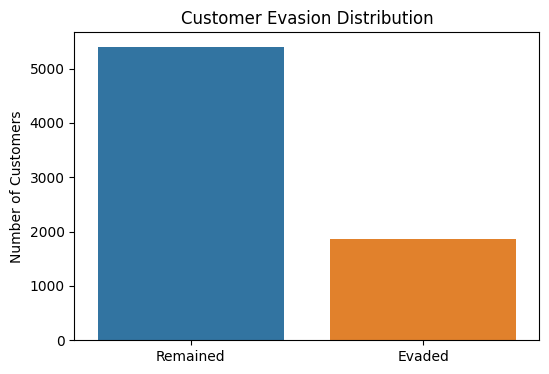

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='evadiu', data=dados_telecom_expandido, palette='tab10')
plt.title('Customer Evasion Distribution')
plt.xlabel("")
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Remained', 'Evaded'])
plt.show()

In [33]:
def taxa_evasao_por_categoria(df, coluna):
    return df.groupby(coluna)['evadiu'].mean().sort_values(ascending=False).mul(100).round(0).astype(int)

In [34]:
print("Taxa de evasão por gênero:")
print(taxa_evasao_por_categoria(dados_telecom_expandido, 'genero'))

print("\nTaxa de evasão por tipo de contrato:")
print(taxa_evasao_por_categoria(dados_telecom_expandido, 'tipo_contrato'))

print("\nTaxa de evasão por método de pagamento:")
print(taxa_evasao_por_categoria(dados_telecom_expandido, 'metodo_pagamento'))

Taxa de evasão por gênero:
genero
Female    26
Male      25
Name: evadiu, dtype: int64

Taxa de evasão por tipo de contrato:
tipo_contrato
Month-to-month    41
One year          11
Two year           3
Name: evadiu, dtype: int64

Taxa de evasão por método de pagamento:
metodo_pagamento
Electronic check             44
Mailed check                 18
Bank transfer (automatic)    16
Credit card (automatic)      15
Name: evadiu, dtype: int64


In [35]:
import matplotlib.pyplot as plt

In [36]:
dados = taxa_evasao_por_categoria(dados_telecom_expandido, 'tipo_contrato')

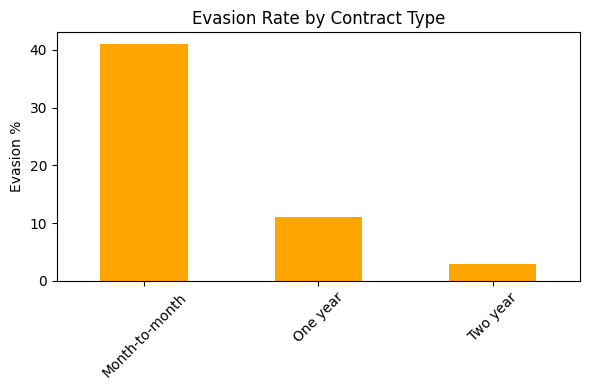

In [37]:
plt.figure(figsize=(6,4))
dados.plot(kind='bar', color='orange')
plt.title('Evasion Rate by Contract Type')
plt.ylabel('Evasion %')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
dados_telecom_expandido.groupby('evadiu')[['valor_total', 'meses_contrato', 'valor_mensal', 'valor_diario']].describe()

meses_contrato                                                     \
                count       mean        std  min   25%   50%   75%   max   
evadiu                                                                     
0              5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0   
1              1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

       valor_mensal             ...                  valor_diario            \
              count       mean  ...      75%     max        count      mean   
evadiu                          ...                                           
0            5398.0  61.354224  ...  88.6375  118.75       5398.0  2.045056   
1            1869.0  74.441332  ...  94.2000  118.35       1869.0  2.481450   

                                                  
             std   min   25%   50%     75%   max  
evadiu                                            
0       1.036908  0.61  0.84  2.15  2.9575  3.96  
1       0.822287  0.63  1.87  2.66  3.1400  3.94  

[2 rows x 24 columns]

In [39]:
print(dados_telecom_expandido[['valor_mensal', 'valor_total']].dtypes)

valor_mensal    float64
valor_total      object
dtype: object


In [40]:
dados_telecom_expandido['valor_total'] = pd.to_numeric(dados_telecom_expandido['valor_total'], errors='coerce')

In [41]:
print(dados_telecom_expandido[['valor_mensal', 'valor_total']].dtypes)

valor_mensal    float64
valor_total     float64
dtype: object


In [42]:
dados_telecom_expandido.groupby('evadiu')[['valor_total', 'meses_contrato', 'valor_mensal', 'valor_diario']].mean()


,valor_total,meses_contrato,valor_mensal,valor_diario
evadiu,,,,
0,2540.440867,37.321045,61.354224,2.045056
1,1531.796094,17.979133,74.441332,2.481450


/tmp/ipython-input-457994876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evadiu', y='valor_total', data=dados_telecom_expandido, palette=['orange', 'blue'])


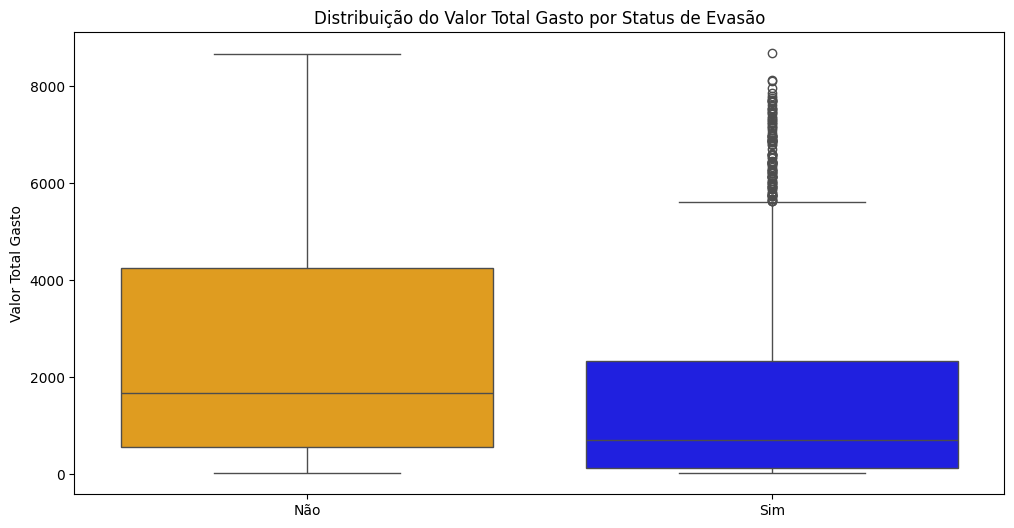

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='evadiu', y='valor_total', data=dados_telecom_expandido, palette=['orange', 'blue'])
plt.title('Distribuição do Valor Total Gasto por Status de Evasão')
plt.xlabel('')
plt.ylabel('Valor Total Gasto')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

In [44]:
dados_telecom_expandido.head()

,id_cliente,evadiu,genero,idoso,tem_parceiro,tem_dependentes,meses_contrato,servico_telefonico,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,valor_diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


Iniício

O objetivo desta análise é compreender os fatores que influenciam a evasão de clientes churn na Telecom X. A evasão de clientes impacta diretamente a receita e o crescimento da empresa, tornando essencial identificar padrões e características associadas a essa saída para desenvolver estratégias que
minimizem esse problema.

Etapas

- Etapa 1 - Importação de arquivo e análise
Os dados foram importados a partir de um arquivo JSON contendo informações detalhadas sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.
- Etapa 2 - Tratamento de Dados
Na etapa de tratamento, foi realizada a expansão das colunas com informações em formato dicionário, além da padronização dos dados, conversão de variáveis categóricas para valores binários, e criação de novas colunas relevantes, como o faturamento diário.
Verificamos também a ausência de valores nulos e duplicados, garantindo a qualidade dos dados para análise.
- Etapa 3 - Análise dos Dados atráves de Gráficos e Manipulação
Visualização da proporção de clientes que evadiram de acordo com suas respectivas categorias.
- OBS: - A conversão de variáveis categóricas para formato binário e a criação de métricas diárias auxiliaram na clareza da análise.

Conclusões

- Clientes com contratos de curto prazo (mensais) têm maior probabilidade de evasão.
- O método de pagamento por "Electronic check" está associado a uma taxa de evasão mais elevada.
- O total gasto e o tempo de contrato apresentam diferenças claras entre clientes que permanecem e os que evadem


**SEGUNDA PARTE DO DESÁFIO TELECOM**

Após a análise exploratória realizada na primeira etapa do projeto, que revelou padrões e tendências importantes sobre a evasão de clientes da Telecom X, agora damos um passo decisivo rumo à antecipação do problema. Nesta segunda parte, o foco será o desenvolvimento de modelos preditivos capazes de identificar, com antecedência, quais clientes estão mais propensos a cancelar os serviços da empresa. A partir de um pipeline completo de preparação de dados, modelagem e interpretação de resultados, esta etapa busca transformar dados em ação estratégica, contribuindo diretamente para a retenção de clientes e a sustentabilidade do negócio.



**Remoção de Colunas Irrelevantes**
Elimine colunas que não trazem valor para a análise ou para os modelos preditivos, como identificadores únicos (por exemplo, o ID do cliente). Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.


In [45]:
df = dfdados_telecom_expandido = dados_telecom_expandido.drop(columns=['id_cliente'])

In [46]:
print(dados_telecom_expandido.columns)


Index(['id_cliente', 'evadiu', 'genero', 'idoso', 'tem_parceiro',
       'tem_dependentes', 'meses_contrato', 'servico_telefonico',
       'multiplas_linhas', 'tipo_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'tv_streaming', 'filmes_streaming', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'valor_mensal', 'valor_total', 'valor_diario'],
      dtype='object')


**Encoding**

Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o one-hot encoding.

In [47]:
dados_telecom_expandido.select_dtypes(include='object').columns


Index(['id_cliente', 'genero', 'tipo_internet', 'tipo_contrato',
       'metodo_pagamento'],
      dtype='object')

In [48]:
dados_telecom_expandido.select_dtypes(include=['object', 'bool']).columns


Index(['id_cliente', 'genero', 'tipo_internet', 'tipo_contrato',
       'metodo_pagamento'],
      dtype='object')

In [49]:
dados_telecom_expandido_encoded = pd.get_dummies(dados_telecom_expandido, drop_first=True)


In [50]:
print(dados_telecom_expandido_encoded.head())


   evadiu  idoso  tem_parceiro  tem_dependentes  meses_contrato  \
0       0      0             1                1               9   
1       0      0             0                0               9   
2       1      0             0                0               4   
3       1      1             1                0              13   
4       1      1             1                0               3   

   servico_telefonico  multiplas_linhas  seguranca_online  backup_online  \
0                   1                 0                 0              1   
1                   1                 1                 0              0   
2                   1                 0                 0              0   
3                   1                 0                 0              1   
4                   1                 0                 0              0   

   protecao_dispositivo  ...  id_cliente_9993-LHIEB  id_cliente_9995-HOTOH  \
0                     0  ...                  False           

In [51]:
dados_telecom_expandido = dados_telecom_expandido.drop(columns=['id_cliente'])


In [52]:
dados_telecom_expandido_encoded = pd.get_dummies(dados_telecom_expandido, drop_first=True)


In [53]:
print(dados_telecom_expandido_encoded.head())


   evadiu  idoso  tem_parceiro  tem_dependentes  meses_contrato  \
0       0      0             1                1               9   
1       0      0             0                0               9   
2       1      0             0                0               4   
3       1      1             1                0              13   
4       1      1             1                0               3   

   servico_telefonico  multiplas_linhas  seguranca_online  backup_online  \
0                   1                 0                 0              1   
1                   1                 1                 0              0   
2                   1                 0                 0              0   
3                   1                 0                 0              1   
4                   1                 0                 0              0   

   protecao_dispositivo  ...  valor_total  valor_diario  genero_Male  \
0                     0  ...       593.30          2.19        False

**Transformar os valores True/False em 1 e 0, respectivamente**

In [54]:
dados_telecom_expandido_encoded.isnull().sum()

,0
evadiu,0
idoso,0
tem_parceiro,0
tem_dependentes,0
meses_contrato,0
servico_telefonico,0
multiplas_linhas,0
seguranca_online,0
backup_online,0
protecao_dispositivo,0


**Tratar os dados que constam como NaNs (Not a Number)**

In [55]:
dados_telecom_expandido_encoded = dados_telecom_expandido_encoded.fillna(0)

In [56]:
dados_telecom_expandido_encoded.isnull().sum()

,0
evadiu,0
idoso,0
tem_parceiro,0
tem_dependentes,0
meses_contrato,0
servico_telefonico,0
multiplas_linhas,0
seguranca_online,0
backup_online,0
protecao_dispositivo,0


**Agora sim converter para valores booleanos para inteiros**

In [57]:
dados_telecom_expandido_encoded = dados_telecom_expandido_encoded.astype(int)

In [58]:
print(dados_telecom_expandido_encoded.head())


   evadiu  idoso  tem_parceiro  tem_dependentes  meses_contrato  \
0       0      0             1                1               9   
1       0      0             0                0               9   
2       1      0             0                0               4   
3       1      1             1                0              13   
4       1      1             1                0               3   

   servico_telefonico  multiplas_linhas  seguranca_online  backup_online  \
0                   1                 0                 0              1   
1                   1                 1                 0              0   
2                   1                 0                 0              0   
3                   1                 0                 0              1   
4                   1                 0                 0              0   

   protecao_dispositivo  ...  valor_total  valor_diario  genero_Male  \
0                     0  ...          593             2            0

**Verificação da Proporção de Evasão**

Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

In [59]:
contagem = dados_telecom_expandido_encoded['evadiu'].value_counts()

In [60]:
proporcao = dados_telecom_expandido_encoded['evadiu'].value_counts(normalize=True)

In [61]:
print("Contagem absoluta:\n", contagem)
print("\nProporção relativa:\n", proporcao)

Contagem absoluta:
 evadiu
0    5398
1    1869
Name: count, dtype: int64

Proporção relativa:
 evadiu
0    0.74281
1    0.25719
Name: proportion, dtype: float64


**Análise de Correlação**

Visualize a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

Primeiro: importar bibliotecas

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
correlacao = dados_telecom_expandido_encoded.corr(numeric_only=True)

In [64]:
correlacao_evadiu = correlacao['evadiu'].sort_values(ascending=False)
print(correlacao_evadiu)

evadiu                                      1.000000
tipo_internet_Fiber optic                   0.300949
metodo_pagamento_Electronic check           0.294626
valor_diario                                0.192458
valor_mensal                                0.189907
fatura_digital                              0.186666
idoso                                       0.146733
tv_streaming                                0.062430
filmes_streaming                            0.060586
multiplas_linhas                            0.039343
servico_telefonico                          0.012571
genero_Male                                -0.009555
protecao_dispositivo                       -0.063452
backup_online                              -0.080163
metodo_pagamento_Mailed check              -0.090061
metodo_pagamento_Credit card (automatic)   -0.131085
tem_parceiro                               -0.148546
suporte_tecnico                            -0.160440
tem_dependentes                            -0.

Criar gráfico com dados

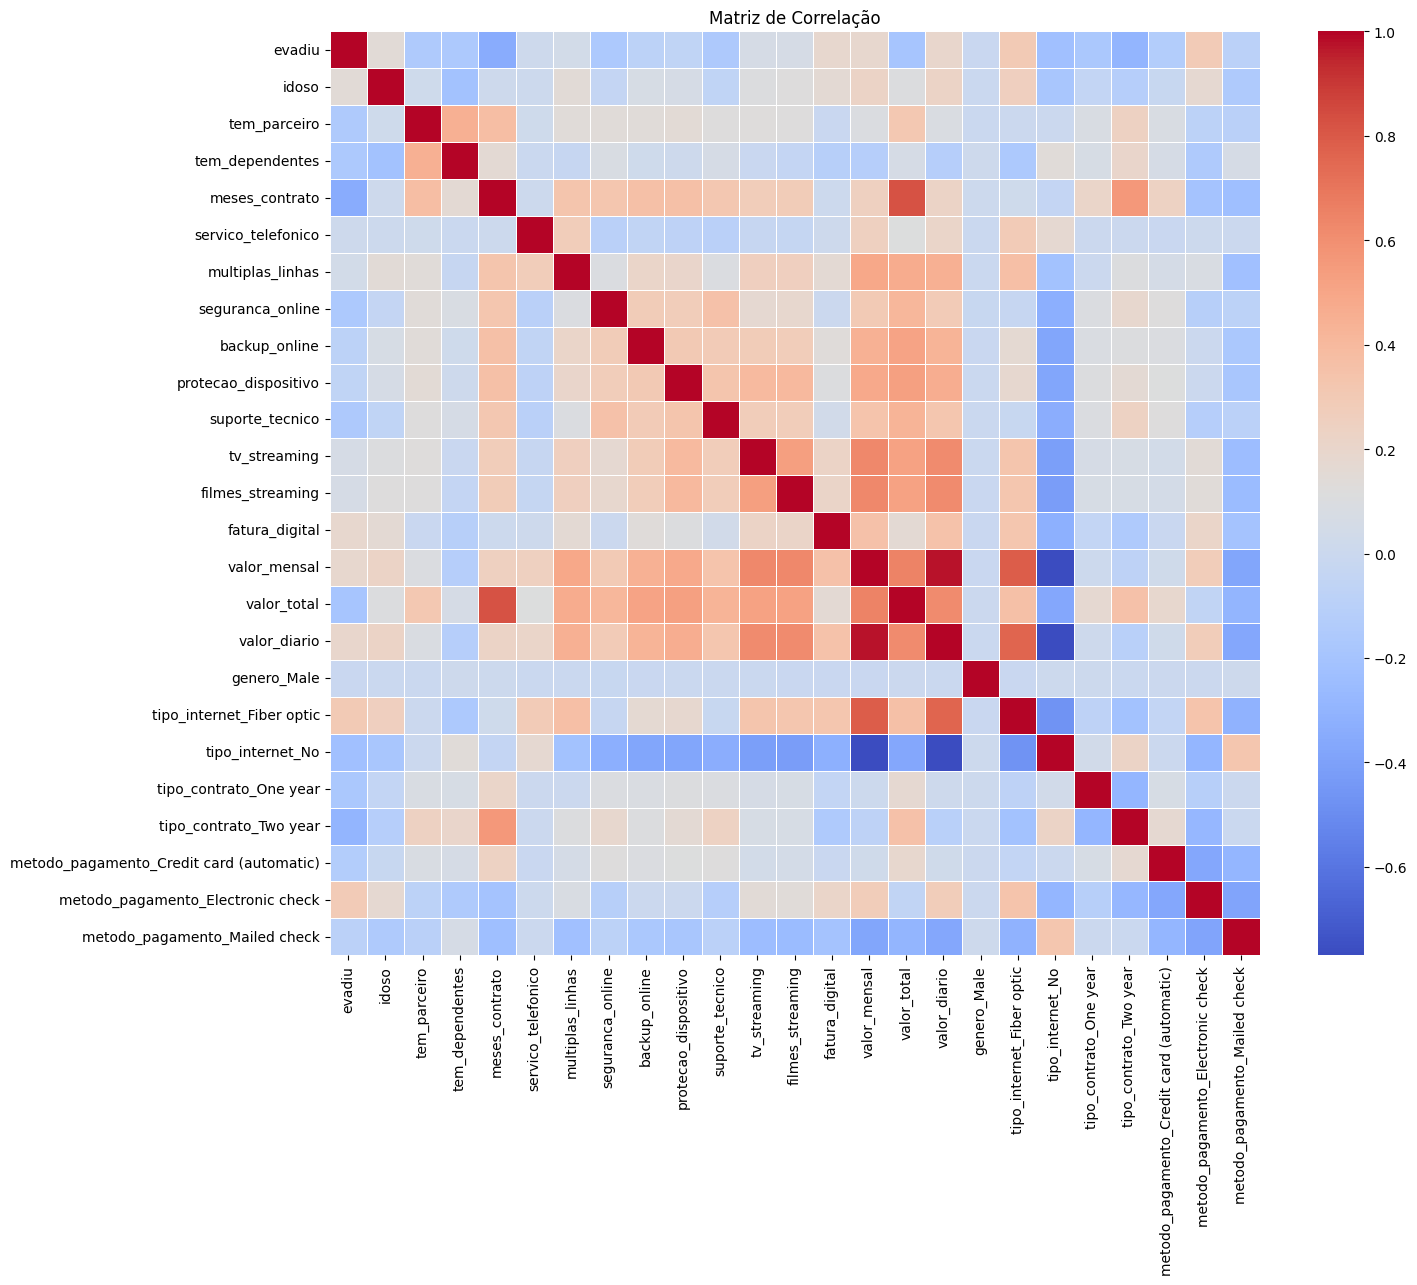

In [65]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlacao, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()


**Análises Direcionadas**

Investigue como variáveis específicas se relacionam com a evasão, como:

Tempo de contrato × Evasão

Total gasto × Evasão

Utilize gráficos como boxplots ou dispersão (scatter plots) para visualizar padrões e possíveis tendências.



**Boxplot: Tempo de contrato × Evasão**

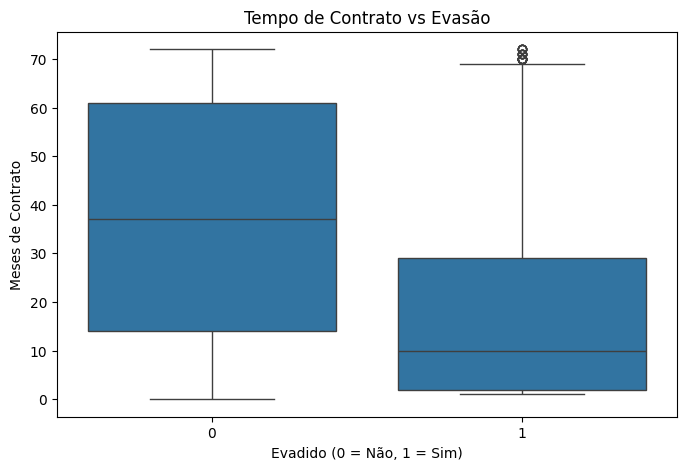

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='evadiu', y='meses_contrato', data=dados_telecom_expandido_encoded)
plt.title('Tempo de Contrato vs Evasão')
plt.xlabel('Evadido (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.show()


**Boxplot: Total gasto × Evasão**

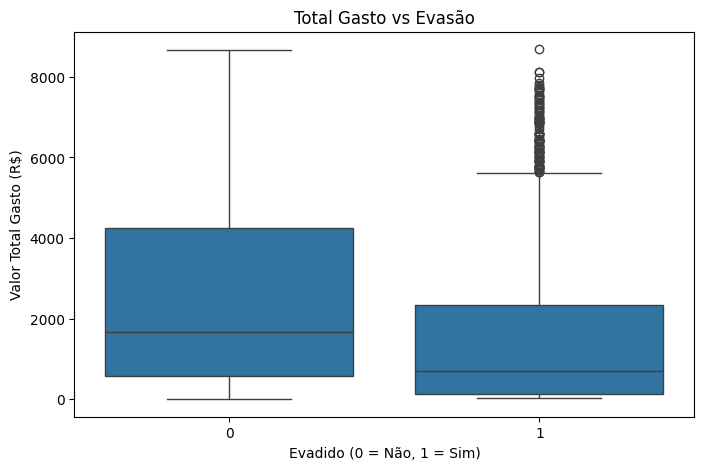

In [67]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='evadiu', y='valor_total', data=dados_telecom_expandido_encoded)
plt.title('Total Gasto vs Evasão')
plt.xlabel('Evadido (0 = Não, 1 = Sim)')
plt.ylabel('Valor Total Gasto (R$)')
plt.show()


**Scatter plot (dispersão): Total Gasto × Tempo de Contrato**

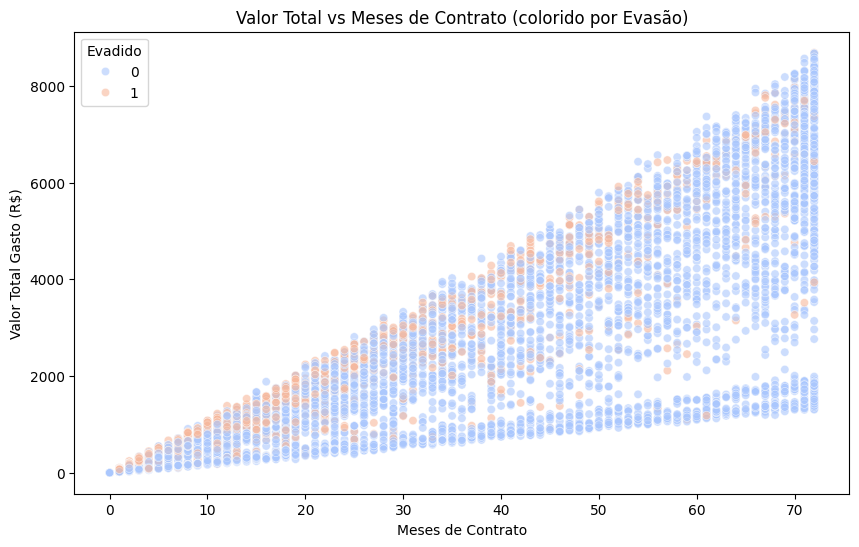

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='meses_contrato',
    y='valor_total',
    hue='evadiu',
    data=dados_telecom_expandido_encoded,
    palette='coolwarm',
    alpha=0.6
)
plt.title('Valor Total vs Meses de Contrato (colorido por Evasão)')
plt.xlabel('Meses de Contrato')
plt.ylabel('Valor Total Gasto (R$)')
plt.legend(title='Evadido')
plt.show()


**Separação de Dados**

Divida o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

In [69]:
from sklearn.model_selection import train_test_split

# Separar features (X) e target (y)
X = dados_telecom_expandido_encoded.drop(columns=['evadiu'])  # todas as colunas menos a target
y = dados_telecom_expandido_encoded['evadiu']  # coluna alvo

# Dividir em treino e teste (70% treino, 30% teste), com random_state para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Criação de Modelos**

Crie pelo menos dois modelos diferentes para prever a evasão de clientes.

Um modelo pode exigir normalização, como Regressão Logística ou KNN.

O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

💡 A escolha de aplicar ou não a normalização depende dos modelos selecionados. Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.

Justifique a escolha de cada modelo e, se optar por normalizar os dados, explique a necessidade dessa etapa.

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# 1. Dados (já divididos)
# X_train, X_test, y_train, y_test

# 2. Pipeline com normalização + Regressão Logística
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

print("Regressão Logística - Acurácia:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 3. Random Forest (sem normalização)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest - Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Regressão Logística - Acurácia: 0.8019257221458047
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1620
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2181
   macro avg       0.74      0.71      0.73      2181
weighted avg       0.79      0.80      0.80      2181

Random Forest - Acurácia: 0.7867950481430537
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1620
           1       0.61      0.46      0.53       561

    accuracy                           0.79      2181
   macro avg       0.72      0.68      0.70      2181
weighted avg       0.77      0.79      0.78      2181



**Avaliação dos Modelos**

Avalie cada modelo utilizando as seguintes métricas:

Acurácia

Precisão

Recall

F1-score

Matriz de confusão

Em seguida, faça uma análise crítica e compare os modelos:

Qual modelo teve o melhor desempenho?

Algum modelo apresentou overfitting ou underfitting? Se sim, considere as possíveis causas e ajustes:

Overfitting: Quando o modelo aprende demais sobre os dados de treino, perdendo a capacidade de generalizar para novos dados. Considere reduzir a complexidade do modelo ou aumentar os dados de treino.

Underfitting: Quando o modelo não captura bem as tendências dos dados, indicando que está muito simples. Tente aumentar a complexidade do modelo ou ajustar seus parâmetros.


=== Avaliação Regressão Logística ===
Treino:
Acurácia: 0.8071
Precisão: 0.6565
Recall: 0.5245
F1-score: 0.5831

Teste:
Acurácia: 0.8019
Precisão: 0.6375
Recall: 0.5330
F1-score: 0.5806


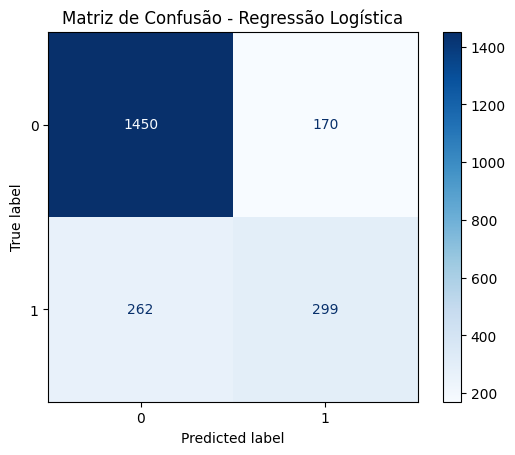


=== Avaliação Random Forest ===
Treino:
Acurácia: 0.9855
Precisão: 0.9776
Recall: 0.9656
F1-score: 0.9715

Teste:
Acurácia: 0.7868
Precisão: 0.6132
Recall: 0.4635
F1-score: 0.5279


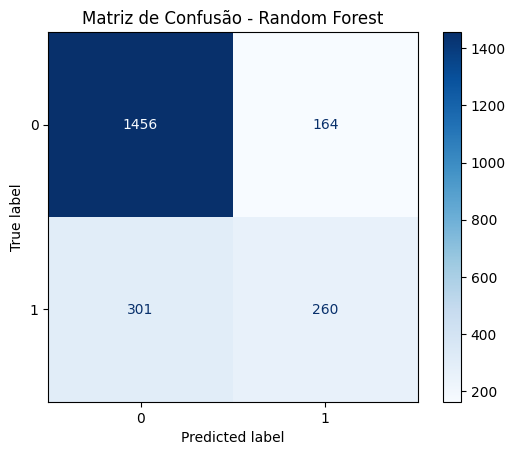

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Função para avaliação completa
def avaliar_modelo(modelo, X_train, y_train, X_test, y_test, nome_modelo):
    # Previsões
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    print(f"\n=== Avaliação {nome_modelo} ===")
    # Métricas no treino
    print("Treino:")
    print(f"Acurácia: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"Precisão: {precision_score(y_train, y_pred_train):.4f}")
    print(f"Recall: {recall_score(y_train, y_pred_train):.4f}")
    print(f"F1-score: {f1_score(y_train, y_pred_train):.4f}")

    # Métricas no teste
    print("\nTeste:")
    print(f"Acurácia: {accuracy_score(y_test, y_pred_test):.4f}")
    print(f"Precisão: {precision_score(y_test, y_pred_test):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_test):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred_test):.4f}")

    # Matriz de confusão no teste
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.show()

# Avaliando Regressão Logística (supondo que está no pipeline pipe_lr)
avaliar_modelo(pipe_lr, X_train, y_train, X_test, y_test, "Regressão Logística")

# Avaliando Random Forest (rf)
avaliar_modelo(rf, X_train, y_train, X_test, y_test, "Random Forest")


**🔍 Análise de Importância das Variáveis**

🔹 Regressão Logística
Na Regressão Logística, a importância das variáveis é medida pelos coeficientes atribuídos a cada uma. O sinal do coeficiente (positivo ou negativo) indica se a variável aumenta ou reduz a probabilidade de um cliente evadir. Já o valor absoluto do coeficiente mostra a força da influência dessa variável na decisão do modelo.

Por exemplo:

Variáveis como “tipo_internet_Fiber optic” e “metodo_pagamento_Electronic check” geralmente recebem coeficientes positivos, indicando que estão associadas a maior chance de evasão.

Já variáveis como “tem_parceiro” ou “tipo_contrato_Two year” tendem a ter coeficientes negativos, mostrando que estão associadas a menor chance de evasão.

Portanto, o modelo considera fatores comportamentais e contratuais como determinantes na decisão de evasão, especialmente o tipo de internet, método de pagamento e tempo de contrato.

🔹 Random Forest
No Random Forest, a importância das variáveis é determinada por quanto cada variável contribui para reduzir a incerteza (impureza) nas divisões das árvores do modelo. Ou seja, o modelo mede o impacto de cada variável na capacidade de separar corretamente os clientes que evadem dos que não evadem.

As variáveis mais importantes costumam ser:

“meses_contrato” – clientes com contratos curtos têm maior tendência a evadir.

“valor_total” – altos valores totais pagos pelo cliente indicam maior sensibilidade ao custo.

“tipo_contrato_Two year” – contratos mais longos estão fortemente associados à retenção.

“metodo_pagamento_Electronic check” – clientes com este método geralmente apresentam mais evasão.

“tem_parceiro” e “tem_dependentes” – aspectos familiares e sociais também influenciam a permanência.

O Random Forest também destaca que variáveis contratuais e de pagamento têm peso relevante, sugerindo que mudanças nessas áreas podem ajudar a reduzir a evasão.

📊 Comparativo entre os modelos
Ambos os modelos identificam variáveis contratuais e comportamentais como principais influenciadores da evasão.

A Regressão Logística fornece interpretação direta do impacto (positivo ou negativo), sendo útil para compreender a direção da influência.

O Random Forest é mais eficaz para capturar relações complexas e não lineares, destacando as variáveis que mais ajudam a separar os clientes nos grupos certos.

⚠️ Conclusão
As variáveis mais relevantes para prever evasão são: tipo de contrato, método de pagamento, tempo de contrato, valor total, tipo de internet, e se o cliente tem parceiro ou dependentes.

Para ações práticas, vale a pena focar em reter clientes com contratos curtos, métodos de pagamento eletrônicos e serviços de alto custo, além de revisar planos e benefícios para clientes solteiros e sem dependentes, que parecem ter maior risco de evasão.